In [1]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
save_path = '/local/users/dlee/ST/result/LOO_CV/'

In [3]:
proposed_file_list = os.listdir(save_path + 'MC_SC_proposed_mapping')
moscot_file_list = os.listdir(save_path + 'MC_SC_moscot_mapping')

In [10]:
with open(file= './result/proposed_all_gene_corr.pkl', mode='rb') as f:
        without_cv=pickle.load(f)

In [4]:
proposed_result = []
for pkl_file_name in proposed_file_list:
    
    with open(file=save_path + 'MC_SC_proposed_mapping/' +  pkl_file_name, mode='rb') as f:
        data=pickle.load(f)
    
    try:
        proposed_result.append([data['gene'].values[0], data['pearson_excl_bleeding'].values[0], data['spearman_excl_bleeding'].values[0]])
    except:
        pass

In [6]:
moscot_result = []
for pkl_file_name in moscot_file_list:

    with open(file=save_path + 'MC_SC_moscot_mapping/' +  pkl_file_name, mode='rb') as f:
        data=pickle.load(f)
    try:
        moscot_result.append([data['gene'].values[0], data['pearson_excl_bleeding'].values[0], data['spearman_excl_bleeding'].values[0]])
    except:
        pass

In [20]:
df_proposed_result = pd.DataFrame(proposed_result, columns = ['gene', 'proposed_pearson', 'proposed_spearman'])
df_moscot_result = pd.DataFrame(moscot_result, columns = ['gene', 'moscot_pearson', 'moscot_spearman'])

df_merged_result = pd.merge(df_proposed_result, df_moscot_result, on="gene", how="inner")

df_merged_result2 = pd.merge(df_proposed_result, without_cv, on="gene", how="inner")
df_merged_result2.rename(columns={"corr_fgw": "Without CV", "proposed_pearson": "Proposed"}, inplace=True)

# plot LOO CV vs with CV (trained by all genes)

/tmp/ipykernel_1828039/1043735763.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


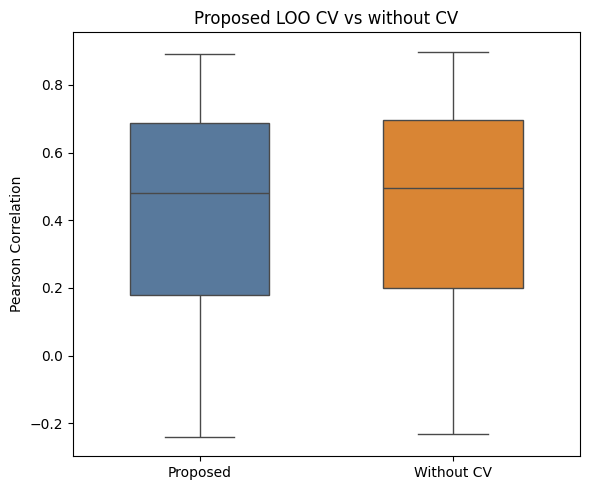

In [24]:
df_box = df_merged_result2[["Proposed", "Without CV"]].melt(
    var_name="Method",
    value_name="Correlation"
)

palette = {
    "Proposed": "#4C78A8", 
    "Without CV": "#F58518"  
}

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=df_box,
    x="Method",
    y="Correlation",
    palette=palette,
    width=0.55
)

plt.title("Proposed LOO CV vs without CV")
plt.xlabel("")
plt.ylabel("Pearson Correlation")
plt.tight_layout()
plt.show()

# Comparison proposed method with moscot (LOO CV)

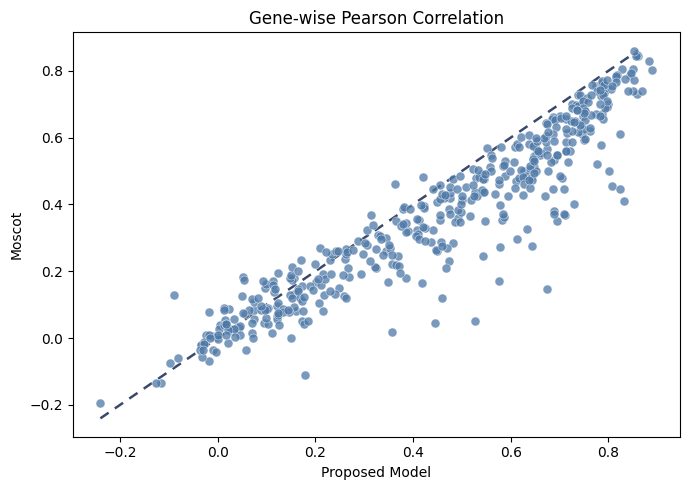

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(
    data=df_merged_result,
    x="proposed_pearson",
    y="moscot_pearson",
    color="#4E79A7",
    s=42,
    alpha=0.75,
    edgecolor="white",
    linewidth=0.4,
    ax=ax
)

lo = min(df_merged_result["proposed_pearson"].min(), df_merged_result["proposed_pearson"].max())
hi = max(df_merged_result["moscot_pearson"].min(), df_merged_result["moscot_pearson"].max())
#ax.plot([lo, hi], [lo, hi], "--", linewidth=1)
ax.plot(
    [lo, hi], [lo, hi],
    linestyle=(0, (4, 3)), 
    linewidth=1.8,
    color="#2F3E63",          # deep slate navy
    alpha=0.95,
    zorder=0
)


ax.set_title("Gene-wise Pearson Correlation")
ax.set_xlabel("Proposed Model")
ax.set_ylabel("Moscot")

#ax.legend(
#    title="gene",
#    bbox_to_anchor=(1.02, 1),
#    loc="upper left",
#    borderaxespad=0.0,
#    frameon=True,
#    ncol=2,              
#    columnspacing=1.2,
#    handletextpad=0.4
#)

if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.tight_layout(rect=[0, 0, 0.70, 1])
plt.show()


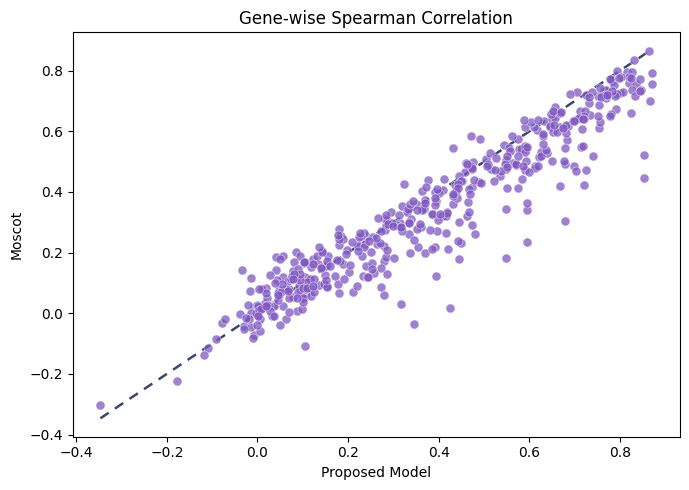

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(
    data=df_merged_result,
    x="proposed_spearman",
    y="moscot_spearman",
    color="#7E57C2",
    s=42,
    alpha=0.75,
    edgecolor="white",
    linewidth=0.4,
    ax=ax
)

lo = min(df_merged_result["proposed_spearman"].min(), df_merged_result["proposed_spearman"].max())
hi = max(df_merged_result["moscot_spearman"].min(), df_merged_result["moscot_spearman"].max())

ax.plot(
    [lo, hi], [lo, hi],
    linestyle=(0, (4, 3)),   
    linewidth=1.8,
    color="#2F3E63",         
    alpha=0.95,
    zorder=0
)


ax.set_title("Gene-wise Spearman Correlation")
ax.set_xlabel("Proposed Model")
ax.set_ylabel("Moscot")

#ax.legend(
#    title="gene",
#    bbox_to_anchor=(1.02, 1),
#    loc="upper left",
#    borderaxespad=0.0,
#    frameon=True,
#    ncol=2,              
#    columnspacing=1.2,
#    handletextpad=0.4
#)

if ax.get_legend() is not None:
    ax.get_legend().remove()

plt.tight_layout(rect=[0, 0, 0.70, 1])
plt.show()
